#### Multilinear Regression
Assumptions in Multinear Regression
- Linear: The rellation between the predictors and the response is linear.
- Independece: Observations are independent of each other.
- Homosecedasticity: The residuals(differences between observed and preicted values) exhibit constant variance at all levels of the predictor.
- Normal Distribution of Errors: The residuals of the model are normaally distributed.
- No multicollinearity: The independent variables should not be too highly correlated with each other.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [17]:
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,NaN,53.700681
1,55,92,105.461264,NaN,50.013401
2,55,92,105.461264,NaN,50.013401
3,70,92,113.461264,NaN,45.696322
4,53,92,104.461264,NaN,50.504232


#### Desription of columns
- MPG : Milege of the car
- HP : Horse power of the car
- VOL : Volume of the car(size)
- SP : Top speed of the car(Miles per Hour)
- WT : Weight of the car(pounds)

#### EDA

In [18]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      0 non-null      float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [19]:
cars.isna().sum()

HP      0
VOL     0
SP      0
WT     81
MPG     0
dtype: int64

#### Observatiions
- There are no missing values
- There are 81 observations
- The data types of the columns are relevent and valid

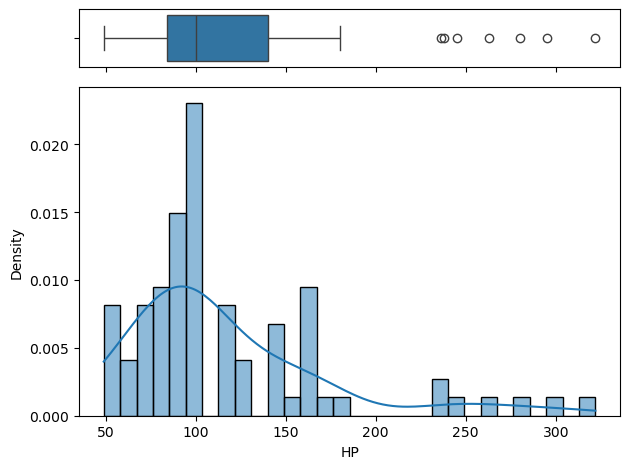

In [20]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


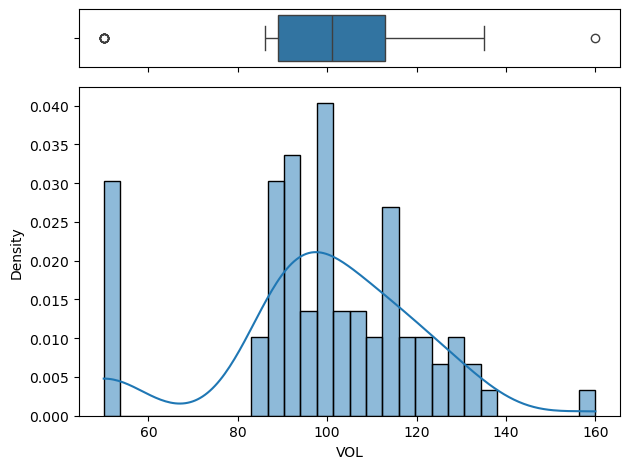

In [21]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


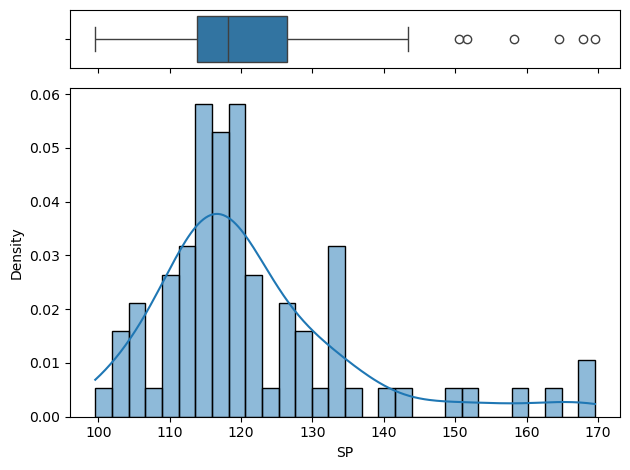

In [22]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


#### Observations from boxplot and histogra
- There are some extreme values(outliers) observed in towards the right tail of SP andd HP didtributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have comw from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

#### Checking for duplication rows

In [14]:
cars[cars.duplicated()]

,HP,VOL,SP,WY,MPG
2,55,92,105.461264,NaN,50.013401
6,55,92,105.461264,NaN,50.013401
8,62,50,102.598513,NaN,46.716554
13,73,89,111.185353,NaN,44.652834
15,73,89,111.185353,NaN,44.652834
17,92,50,117.598513,NaN,39.354094
18,78,91,114.369293,NaN,42.789909
27,92,99,119.105055,NaN,38.411003
38,102,86,116.909442,NaN,34.070668
50,115,101,118.288996,NaN,29.629936


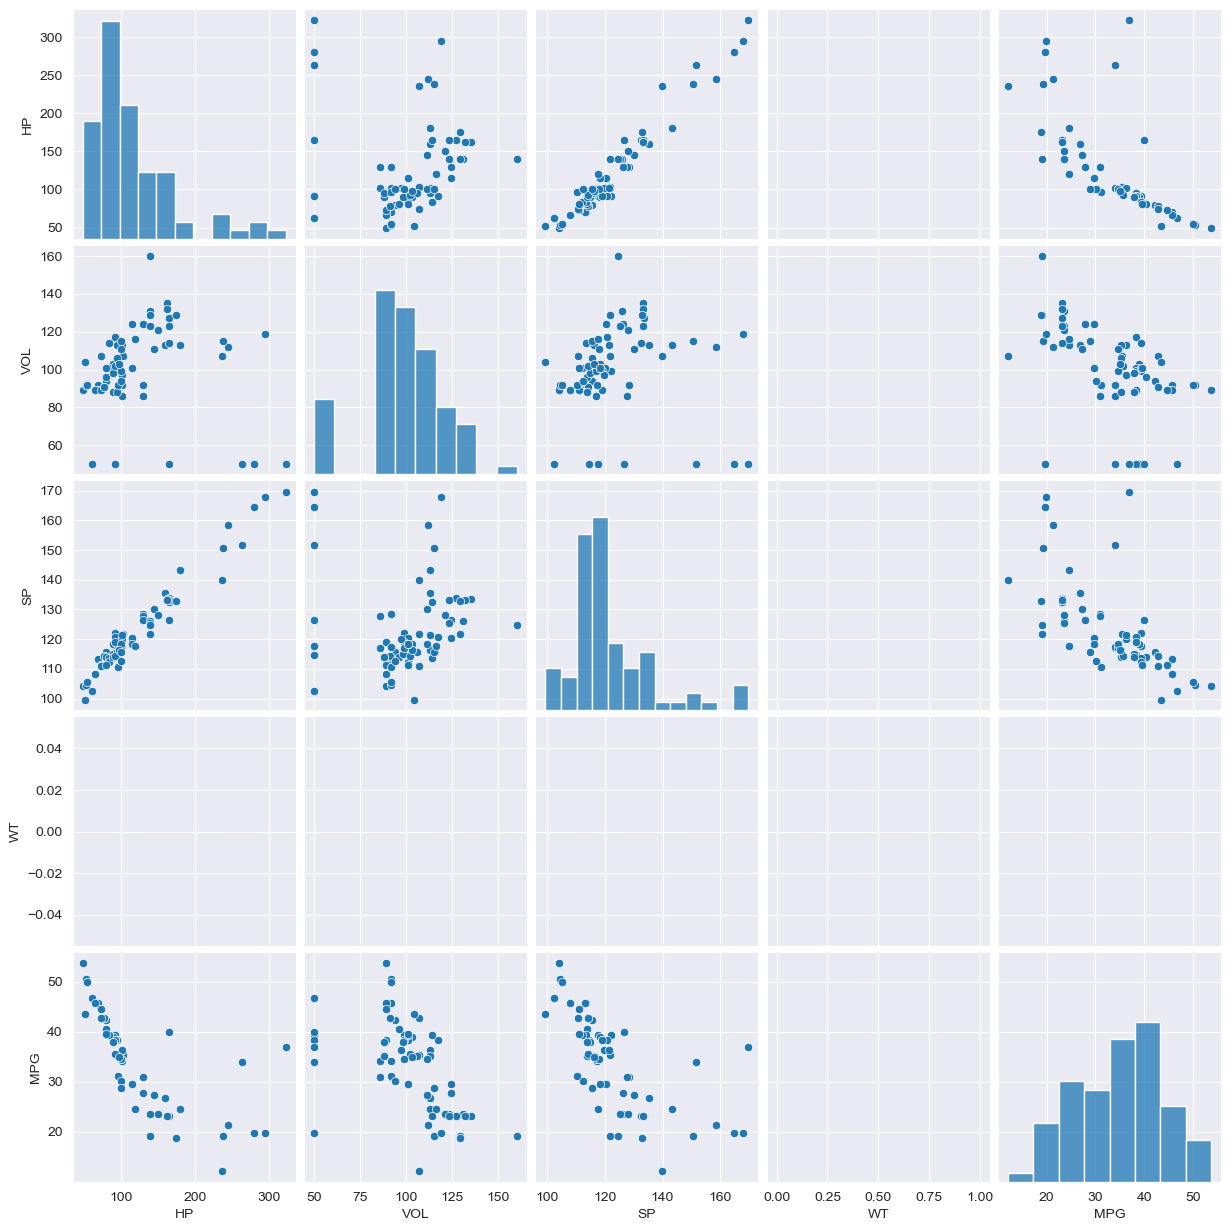

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [32]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,NaN,-0.725038
VOL,0.077459,1.000000,0.102170,NaN,-0.529057
SP,0.973848,0.102170,1.000000,NaN,-0.687125
WT,NaN,NaN,NaN,NaN,NaN
MPG,-0.725038,-0.529057,-0.687125,NaN,1.000000


#### Observations
- Relation between linear and non linear variables
- Strength and direction of correlation
- Between x and y, all the variables are showing  moderate to high correlation strengths, highest being between HP and  MPG
- Among x columns (x1,x2,x3 and x4), some very high correlation srength are observed between SP vs HP,VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

##### Prepare a preliminary model cnsidering all columns

In [36]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity